# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Carregando os dados
df = pd.read_csv('previsao_de_renda.csv', index_col='index')

In [5]:
# Análise exploratória inicial
print(df.head())  # Visualizando as primeiras linhas
print(df.describe())  # Estatísticas descritivas


       Unnamed: 0    data_ref sexo  posse_de_veiculo  posse_de_imovel  \
index                                                                   
8682            0  2015-01-01    F             False             True   
12830           1  2015-01-01    M              True             True   
2885            2  2015-01-01    M              True             True   
16168           3  2015-01-01    F              True            False   
12438           4  2015-01-01    M             False            False   

       qtd_filhos   tipo_renda           educacao estado_civil  \
index                                                            
8682            1  Assalariado         Secundário       Casado   
12830           0   Empresário         Secundário       Casado   
2885            2  Assalariado  Superior completo       Casado   
16168           0   Empresário         Secundário       Casado   
12438           0  Assalariado         Secundário       Casado   

      tipo_residencia  id

In [6]:
# Variáveis numéricas

df_num = df.select_dtypes('number')
df_num.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
index,,,,,,
8682,0,1,36,3.575342,3.0,3369.24
12830,1,0,42,0.860274,2.0,6096.14
2885,2,2,31,8.065753,4.0,5658.98
16168,3,0,50,1.208219,2.0,7246.69
12438,4,0,52,13.873973,2.0,4017.37


In [7]:
# Remover a coluna 'Unnamed: 0' do DataFrame df_num
df_num = df_num.drop(columns=['Unnamed: 0'])

# Verificar o resultado
df_num.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
index,,,,,
8682,1,36,3.575342,3.0,3369.24
12830,0,42,0.860274,2.0,6096.14
2885,2,31,8.065753,4.0,5658.98
16168,0,50,1.208219,2.0,7246.69
12438,0,52,13.873973,2.0,4017.37


In [8]:
# Definindo a matriz de correlação

corr_df = df_num.corr()
corr_df

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


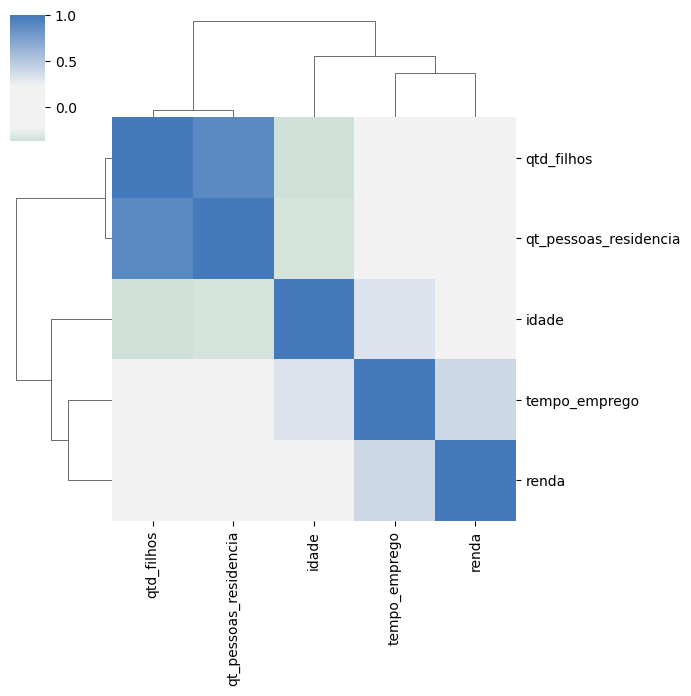

In [9]:
# Gerando uma visualização gráfica da matriz de correlação

# Definindo o mapa de cores
cmap = sns.diverging_palette(h_neg=150, h_pos=250, as_cmap=True, sep=60, center='light')
# Gerando a figura
sns.clustermap(corr_df, figsize=[7,7], center=0, cmap=cmap)

In [10]:
#entre a qtd_filhos e qt_pessoas_residencia: A correlação é muito alta (próxima de 1). Isso indica que, em geral, quanto mais filhos uma pessoa tem, maior é o número de pessoas residindo em sua casa. Essa relação é bastante intuitiva.
#entre qtd_filhos e idade: A correlação é negativa e moderada. Isso sugere que, à medida que a idade aumenta, a tendência é ter menos filhos.
#entre tempo_emprego e renda: A correlação é positiva e moderada. Isso indica que, em geral, quanto mais tempo uma pessoa trabalha, maior é sua renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [12]:
corr_df

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


In [13]:
print(df_num.index.duplicated().any())

True


In [14]:
df_num = df_num.reset_index(drop=True)

In [15]:
print(df_num.columns[df_num.columns.duplicated()])

Index([], dtype='object')


In [16]:
df_num = df_num.loc[:, ~df_num.columns.duplicated()]

In [17]:
print(df_num[['tempo_emprego', 'renda']].dtypes)
print(df_num[['tempo_emprego', 'renda']].isnull().sum())

tempo_emprego    float64
renda            float64
dtype: object
tempo_emprego    2534
renda               0
dtype: int64


In [18]:
df_num['tempo_emprego'] = pd.to_numeric(df_num['tempo_emprego'], errors='coerce')
df_num['renda'] = pd.to_numeric(df_num['renda'], errors='coerce')
df_num = df_num.dropna(subset=['tempo_emprego', 'renda'])

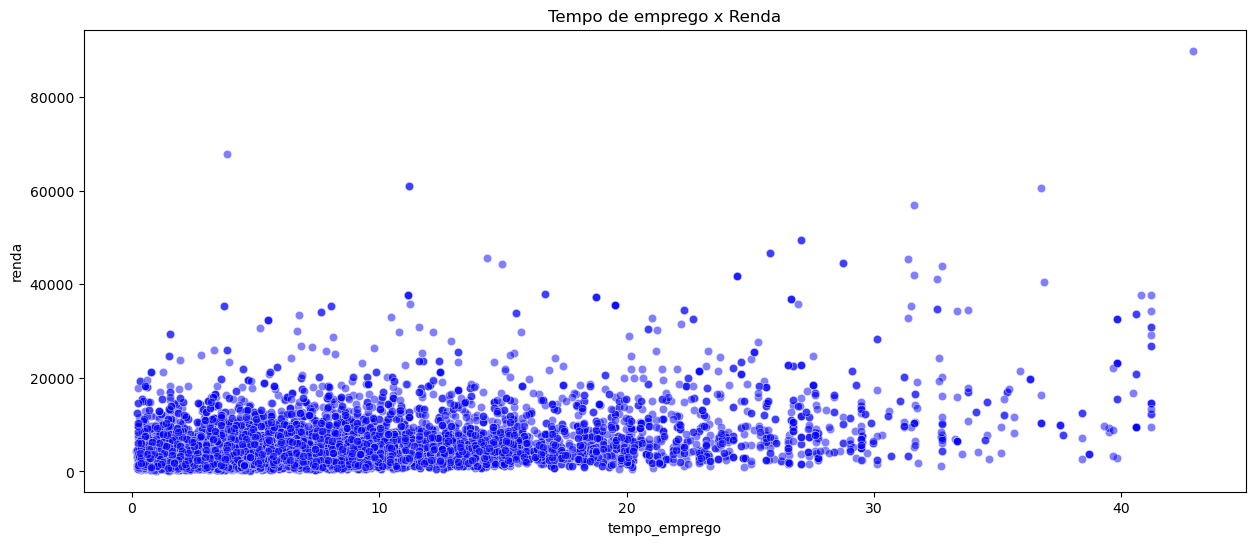

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=[15,6])
sns.scatterplot(
    data=df_num,
    x='tempo_emprego',
    y='renda',
    color='blue',
    alpha=.5
)

plt.title('Tempo de emprego x Renda')
plt.show()


3) Na su aopinião, há outliers na variável renda?

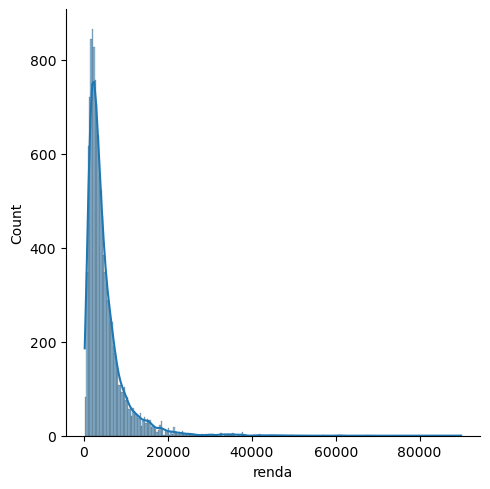

In [22]:
# Gerando um gráfico de distribuição da renda

sns.displot(
    df_num, 
    x='renda',
    # bins=50,
    kde=True
)

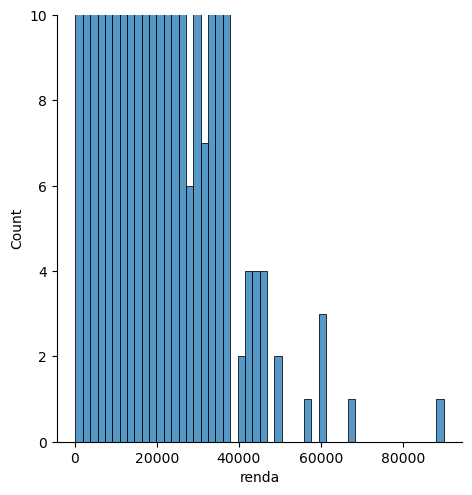

In [23]:
# Aplicando um zoom à figura (limitando o eixo y)

fig = sns.displot(
    df_num, 
    x='renda',
    bins=50,
    # kde=True
)

fig.set(ylim=(0, 10))

In [25]:
#sim

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [36]:
# Calculando o logaritmo

df_log = df_num.copy()
df_log['renda_log'] = np.log(df_log['renda'])
df_log

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
0,1,36,3.575342,3.0,3369.24,8.122442
1,0,42,0.860274,2.0,6096.14,8.715411
2,2,31,8.065753,4.0,5658.98,8.640999
3,0,50,1.208219,2.0,7246.69,8.888300
4,0,52,13.873973,2.0,4017.37,8.298383
...,...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29,7.084469
14996,1,30,12.079452,3.0,2519.18,7.831689
14997,0,40,2.161644,2.0,1586.85,7.369506
14998,0,47,3.295890,2.0,6975.39,8.850144


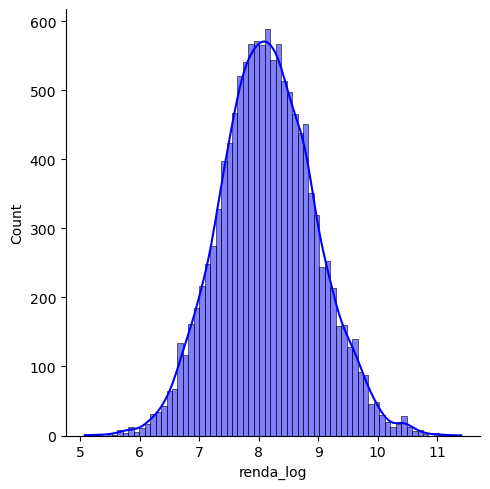

In [39]:
# Gerando um gráfico de distribuição 
sns.displot(
    df_log,
    x='renda_log',
    kde=True,
    color='blue',
)

Text(0.5, 1.0, 'idade x renda_log')

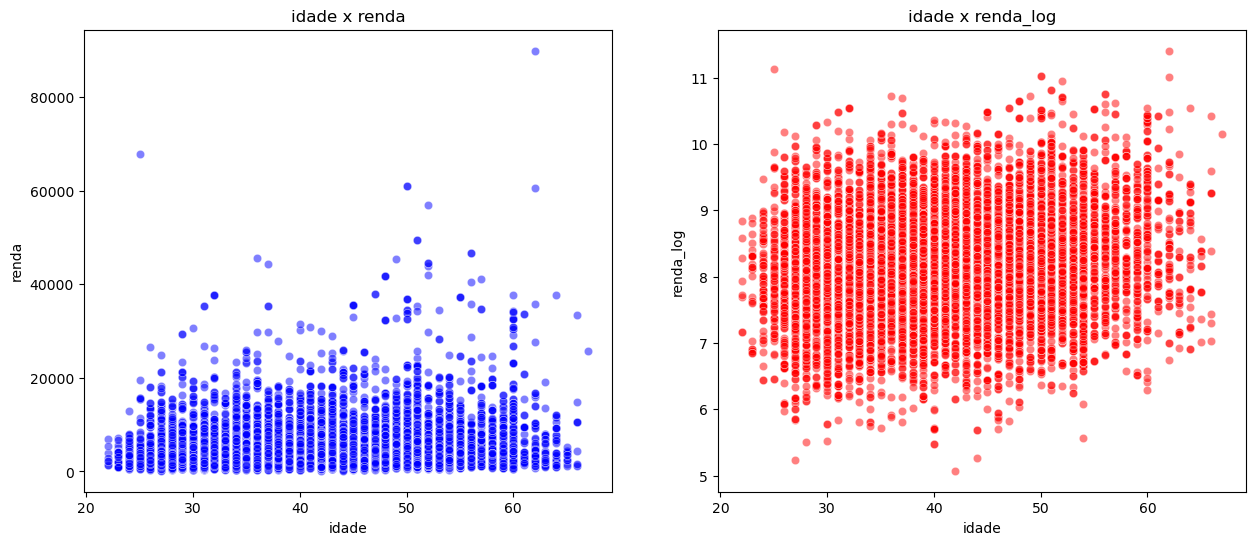

In [41]:
# Gráfico de dispersão da idade x renda

fig, axes = plt.subplots(1,2)
plt.rc('figure', figsize=(15,6))

ax1 = sns.scatterplot(ax = axes[0], x='idade', y='renda', data=df_log, alpha=.5, color='blue')
ax1.set_title('idade x renda')
ax2 = sns.scatterplot(ax = axes[1], x='idade', y='renda_log', data=df_log, alpha=.5, color='red')
ax2.set_title('idade x renda_log')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [43]:
# Calculando o logaritmo

df_log = corr_df.copy()
df_log['renda_log'] = np.log(df_log['renda'])
df_log

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,-4.649473
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,-3.156611
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,-0.930808
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,-3.864334
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.000000


In [ ]:
#piorou. renda 	0.394235	renda_log-0.930808